In [1]:
from sklearn.datasets import make_multilabel_classification

X, t = make_multilabel_classification(n_samples= 200, n_features= 10, n_classes= 2, n_labels=3, random_state = 0)

In [4]:
y = t[:,1]* 2 + t[:,0]

array([3, 3, 2, 3, 3, 0, 1, 3, 0, 1, 1, 2, 3, 1, 2, 3, 0, 3, 0, 2, 2, 3,
       0, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 0, 3, 3, 2, 3, 0, 3, 3, 3, 0, 2,
       3, 0, 3, 2, 2, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0,
       3, 0, 3, 2, 2, 3, 2, 3, 2, 3, 0, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 1,
       1, 0, 3, 3, 2, 2, 2, 0, 2, 1, 3, 1, 3, 2, 0, 2, 3, 0, 3, 2, 3, 3,
       3, 0, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 1, 3, 0, 3, 2, 2,
       1, 3, 1, 1, 3, 1, 0, 0, 3, 1, 1, 3, 0, 3, 3, 2, 0, 3, 2, 2, 2, 3,
       2, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 1, 3, 1, 0, 3, 3, 0, 1, 1, 3, 1,
       3, 2])

In [6]:
print('label 0: ', len(y[y==0]))
print('label 1: ', len(y[y==1]))
print('label 2: ', len(y[y==2]))
print('label 3: ', len(y[y==3]))

label 0:  30
label 1:  24
label 2:  41
label 3:  105


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
np.random.seed(0)
#split the data into train and test dataset
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

#scale the dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [13]:
param_grid = {'C':[1, 10, 25, 50, 75, 100]}

grid1 = GridSearchCV(LogisticRegression(multi_class = 'auto', solver = 'lbfgs', max_iter = 5000), 
                    param_grid, cv = 7, return_train_score= True, iid = False)

In [14]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None, param_grid={'C': [1, 10, 25, 50, 75, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [24]:
print(grid1.best_params_)
print('validation score: ', grid1.best_score_)
print(grid1.scorer_)

{'C': 25}
validation score:  0.8013457556935818
<function _passthrough_scorer at 0x00000187186594C8>


In [16]:
import pandas as pd
result1 = pd.DataFrame(grid1.cv_results_)
result1

c:\users\nxs045000\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\nxs045000\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.009369,0.007290,0.0,0.0,1,{'C': 1},0.652174,0.772727,0.727273,0.714286,...,6,0.771654,0.742188,0.773438,0.744186,0.759690,0.744186,0.746154,0.754499,0.012614
1,0.013391,0.005467,0.0,0.0,10,{'C': 10},0.826087,0.818182,0.681818,0.761905,...,2,0.858268,0.828125,0.875000,0.868217,0.860465,0.860465,0.815385,0.852275,0.020300
2,0.011351,0.007192,0.0,0.0,25,{'C': 25},0.826087,0.818182,0.681818,0.714286,...,1,0.842520,0.859375,0.890625,0.868217,0.875969,0.883721,0.853846,0.867753,0.015794
3,0.017853,0.005466,0.0,0.0,50,{'C': 50},0.869565,0.818182,0.681818,0.714286,...,3,0.850394,0.875000,0.890625,0.868217,0.891473,0.883721,0.861538,0.874424,0.014252
4,0.017853,0.005465,0.0,0.0,75,{'C': 75},0.869565,0.818182,0.636364,0.714286,...,4,0.850394,0.890625,0.882812,0.875969,0.891473,0.891473,0.869231,0.878854,0.014059
5,0.022316,0.007722,0.0,0.0,100,{'C': 100},0.869565,0.818182,0.636364,0.714286,...,4,0.858268,0.890625,0.890625,0.875969,0.891473,0.891473,0.876923,0.882194,0.011670


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(result1.shape[0]), result1['mean_train_score'], label = 'mean train score')
plt.plot(range(result1.shape[0]), result1['mean_test_score'], label = 'mean test score')
plt.xticks(range(result1.shape[0]), result1['param_C'], rotation = 90)
plt.plot([grid1.best_index_], result1['mean_train_score'][grid1.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid1.best_index_], result1['mean_test_score'][grid1.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

In [25]:
param_grid = {'C':[1, 10, 25, 50, 75, 100]}

grid2 = GridSearchCV(LogisticRegression(multi_class = 'auto', solver = 'lbfgs', max_iter = 5000), 
                    param_grid, cv = 7, return_train_score= True, iid = False, scoring = 'recall_macro' )

In [26]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None, param_grid={'C': [1, 10, 25, 50, 75, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='recall_macro', verbose=0)

In [28]:
print(grid2.best_params_)
print(grid2.best_score_)
print(grid2.scorer_)

{'C': 50}
0.7680735930735931
make_scorer(recall_score, pos_label=None, average=macro)


# Example 2

In [29]:
from sklearn.datasets import make_multilabel_classification
X, y = make_multilabel_classification(n_samples=500, n_features=10, n_classes = 1, n_labels = 2,
                                     random_state = 0)
print('label 0:', len(y[y == 0])/len(y))
print('label 1:', len(y[y == 1])/len(y))
y = y.reshape(-1,)

label 0: 0.344
label 1: 0.656


In [30]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train = scaler.fit_transform(X_train_org)
X_tets = scaler.transform(X_test_org)

In [43]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [1, 2, 3, 5, 7, 10]}
grid3 = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv = 5, return_train_score= True, iid = False, 
                    scoring = 'recall')

In [44]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
     

In [45]:
print(grid3.best_score_)
print(grid3.best_params_)

0.8734693877551021
{'max_depth': 2}


In [46]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, confusion_matrix

y_train_pred = grid3.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[ 70,  60],
       [ 20, 225]], dtype=int64)

In [47]:
roc_auc_score(y_train, y_train_pred)

0.728414442700157

In [50]:
from sklearn.metrics import roc_curve
y_train_prob = grid3.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_train_prob[:,0])
threshold

array([1.77777778, 0.77777778, 0.37804878, 0.31914894, 0.08974359])

Text(0, 0.5, 'TPR')

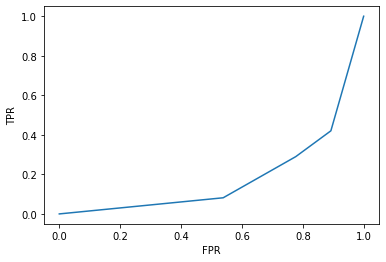

In [49]:
%matplotlib inline

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [53]:
y_train_prob[:,0]
y_pred = np.where(y_train_prob[:,0] < 0.3, 0, 1)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [54]:
y_train

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
roc_auc_score(y_train, y_pred)

0.2640502354788069